# Data Preparation and Visualization

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data and show info for each column
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# describe the data in each column
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# show the shape of the dataset
data.shape

(299, 13)

In [ ]:
# check for null values in each column
print(data.isnull().sum())
print('')

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64



In [ ]:
# function for removing outliers
# use the interquartile range method, where anything 1.5 IQR below Q1 or 1.5 IQR above Q3 are outliers, and replace them with NAs
def remove_outliers(data):

  Q1 = data.quantile(.25)
  Q3 = data.quantile(.75)
  IQR = Q3-Q1

  return np.where((data > (Q3+(IQR*1.5))) | (data < (Q1-(IQR*1.5))),np.nan,data)

In [ ]:
#remove outliers
for i in data.columns:
  data[i] = remove_outliers(data[i])

# check if there are any NAs
print('Are there missing points?')
print(data.isnull().any())

Are there missing points?
age                         False
anaemia                     False
creatinine_phosphokinase     True
diabetes                    False
ejection_fraction            True
high_blood_pressure         False
platelets                    True
serum_creatinine             True
serum_sodium                 True
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool


In [ ]:
# fill in NAs with medians of each column
for i in data.columns:
  data[i] = data[i].fillna(data[i].median())

# recheck if there are any NAs now
print('Are there missing points?')
print(data.isnull().any())

Are there missing points?
age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool


In [ ]:
# show correlation matrix of each column and death
corr_matrix = data.corr()

print('Correlation Matrix of Features and Death')
print('')
print(corr_matrix["DEATH_EVENT"].sort_values(ascending=False))

Correlation Matrix of Features and Death

DEATH_EVENT                 1.000000
serum_creatinine            0.327965
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase   -0.000284
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.030005
serum_sodium               -0.175212
ejection_fraction          -0.283244
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


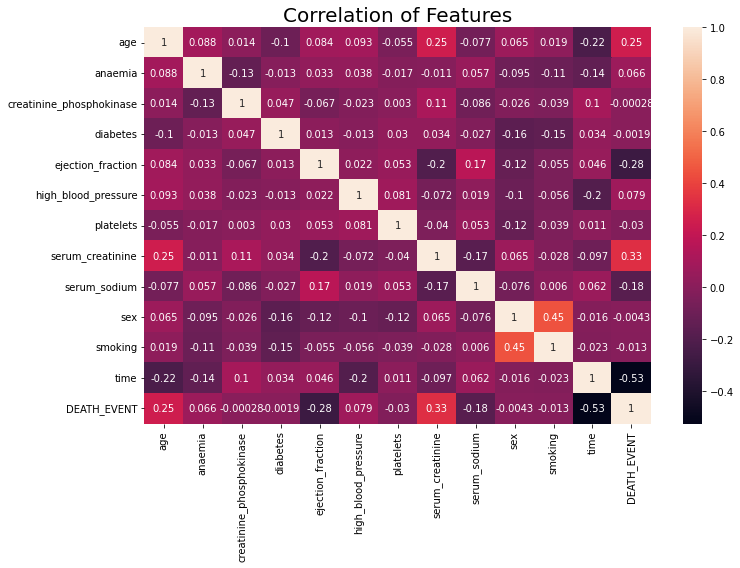

In [ ]:
# show correlations of features
# choose the 2 features with the most correlation, EXCLUDING TIME WHICH IS DIRECTLY RELATED TO DEATH
plt.figure(figsize=(11, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation of Features', size = 20)
plt.tight_layout()
plt.savefig('cor matrix.png')
plt.show()

In [ ]:
# show the counts of each value in the serum creatinine column
data['serum_creatinine'].value_counts()

1.10    61
1.00    50
0.90    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.70     9
1.40     9
1.83     8
1.60     6
1.50     5
2.10     5
1.90     5
0.60     4
1.80     4
0.50     1
0.75     1
2.00     1
Name: serum_creatinine, dtype: int64

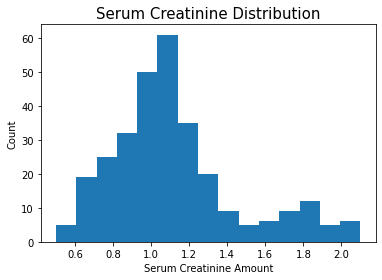

In [ ]:
# plot distribution of serum creatinine
plt.hist(data['serum_creatinine'],bins=15)
plt.title('Serum Creatinine Distribution', size = 15)
plt.xlabel('Serum Creatinine Amount')
plt.ylabel('Count')
plt.savefig('serum_creat.png')
plt.show()

In [ ]:
# show counts of each value of ejection fraction column
data['ejection_fraction'].value_counts()

35.0    49
38.0    42
40.0    37
25.0    36
30.0    34
60.0    31
50.0    21
45.0    20
20.0    18
55.0     3
17.0     2
62.0     2
15.0     2
14.0     1
65.0     1
Name: ejection_fraction, dtype: int64

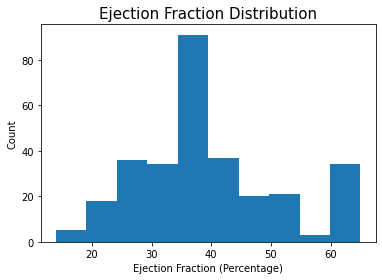

In [ ]:
# histogram of ejection fraction column
plt.hist(data['ejection_fraction'])
plt.title('Ejection Fraction Distribution',size = 15)
plt.xlabel('Ejection Fraction (Percentage)')
plt.ylabel('Count')
plt.savefig('eject_frac.png')
plt.show()

# Logistic Regression

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [ ]:
# using just two features
features = ['ejection_fraction','serum_creatinine']
X = data[features]
y = data['DEATH_EVENT']

In [ ]:
# split into training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 5)

In [ ]:
# scale data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression model

model = LogisticRegression()
model.fit(X_train, y_train)   
predict = model.predict(X_test)

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, predict)
score = accuracy_score(y_test, predict)
f1 = f1_score(y_test, predict)

print(cm)
print("Accuracy:" , score)
print('F1 score:',f1)

[[42  1]
 [ 9  8]]
Accuracy: 0.8333333333333334
F1 score: 0.6153846153846153


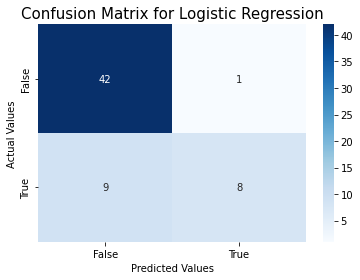

In [ ]:
# graph confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression', size = 15);
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("log_reg_cm.png")
plt.show()

# Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# get accuracy from confusion matrix
results = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("results: ", results)
print("accuracy: ", results.mean() * 100)
print("standard deviation: ", results.std())

results:  [0.8125     0.72916667 0.72916667 0.70833333 0.65957447]
accuracy:  72.77482269503545
standard deviation:  0.04941960434785671


#SVM Classifier

In [ ]:
# scale data and initialize training and testing set
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

features = ['ejection_fraction','serum_creatinine']
X = data[features]
y = data['DEATH_EVENT']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=5)

In [ ]:
# svm classifier using rbf kernel 
# show accuracy, confusion matrix, and f1 score
rbf_kernel_svm_clf = SVC(kernel = "rbf", gamma = 5, C = 25) 
    
rbf_kernel_svm_clf.fit(X_train, y_train)

y_pred = rbf_kernel_svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
print('Accuracy from SVM:',svm_acc)

svm_f1 = f1_score(y_test, y_pred)

print('F1 score:',svm_f1)

confuse = confusion_matrix(y_test,y_pred)
print(confuse)

Accuracy from SVM: 0.8166666666666667
F1 score: 0.7027027027027027
[[36  7]
 [ 4 13]]


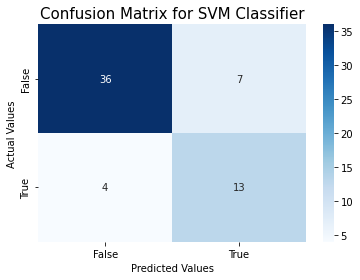

In [ ]:
# show confusion matrix
ax = sns.heatmap(confuse, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for SVM Classifier', size = 15);
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("svm cm.png")
plt.show()

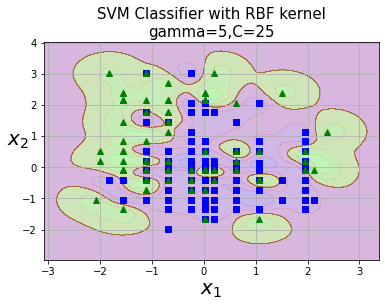

In [ ]:
# graph SVM classifier
from mlxtend.plotting import plot_decision_regions

x_min, x_max = X.iloc[:, 0].values.min() - 1, X.iloc[:, 0].values.max() + 1
y_min, y_max = X.iloc[:, 1].values.min() - 1, X.iloc[:, 1].values.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

def plot_dataset(X, y, axes):
    plt.plot(X.iloc[:,0].values[y==0], X.iloc[:,1].values[y==0], "bs")
    plt.plot(X.iloc[:,0].values[y==1], X.iloc[:,1].values[y==1], "g^")
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    

X_ = np.c_[xx.ravel(), yy.ravel()]
y_predict = rbf_kernel_svm_clf.predict(X_).reshape(xx.shape)
y_decision = rbf_kernel_svm_clf.decision_function(X_).reshape(xx.shape)
plot_dataset(X, y, [0,65, 0, 3])
plt.contourf(xx, yy, y_predict, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(xx, yy, y_decision, cmap=plt.cm.brg, alpha=0.1)
plt.title('SVM Classifier with RBF kernel\ngamma=5,C=25', size = 15)

plt.savefig("svm plot.png")

# Decision Tree

In [ ]:
# initialize train and test sets, and scale
from sklearn.tree import DecisionTreeClassifier

features = ['ejection_fraction','serum_creatinine']
X = data[features]
y = data['DEATH_EVENT']


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=5)


In [ ]:
# decision tree classifier accuracy and f1 score
tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=50)  
tree_clf.fit(X_train, y_train)

tree_pred= tree_clf.predict(X_test)

tree_acc = accuracy_score(y_test, tree_pred)

print('Accuracy from Decision Tree:',tree_acc)

tree_f1 = f1_score(y_test, tree_pred)
print('f1',tree_f1)

Accuracy from Decision Tree: 0.7833333333333333
f1 0.6486486486486486


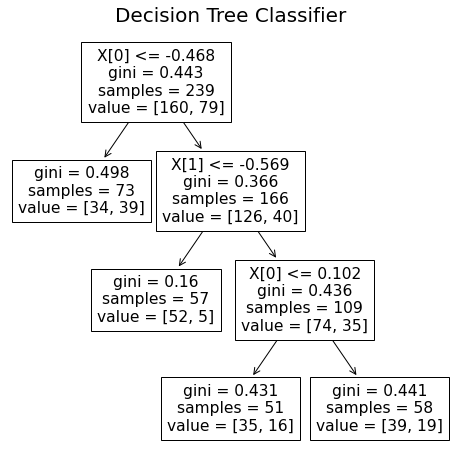

In [ ]:
# visualize decision tree
from sklearn import tree
plt.figure(figsize=(8,8))
tree.plot_tree(tree_clf)
plt.title('Decision Tree Classifier', size = 20)
plt.savefig("dt_plot.png")
plt.show()

# Ensemble Learning

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
forest.fit(X_train,y_train)  
y_pred = forest.predict(X_test)
forest_acc = forest.score(X_test,y_test)
forest_f1 = f1_score(y_test, y_pred)
print('accuracy:', forest_acc)
print('f1:',forest_f1)

accuracy: 0.8166666666666667
f1: 0.7027027027027027


In [ ]:
#voting classifier
from sklearn.ensemble import VotingClassifier


log_clf = model.fit(X_train, y_train) 

# tree_clf defined in Decision Tree section

svm_clf = rbf_kernel_svm_clf

voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('dt', tree_clf), ('svc', svm_clf), ('rf',forest)],
 voting='hard')

print('Accuracy Scores of Classifiers:')
print('')
acc_score = []
model_list = []
for clf in (log_clf, tree_clf, svm_clf, forest, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_score.append(acc)
    model_list.append(clf.__class__.__name__)
    print(clf.__class__.__name__, 'accuracy:',accuracy_score(y_test, y_pred), 'f1:',f1_score(y_test, y_pred))

Accuracy Scores of Classifiers:

LogisticRegression accuracy: 0.8333333333333334 f1: 0.6153846153846153
DecisionTreeClassifier accuracy: 0.7833333333333333 f1: 0.6486486486486486
SVC accuracy: 0.8166666666666667 f1: 0.7027027027027027
RandomForestClassifier accuracy: 0.8166666666666667 f1: 0.7027027027027027
VotingClassifier accuracy: 0.8666666666666667 f1: 0.7333333333333334


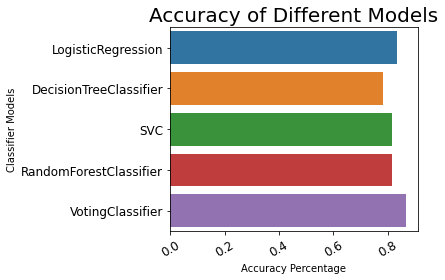

In [ ]:
sns.barplot(x= acc_score, y = model_list)
plt.xlabel('Accuracy Percentage')
plt.ylabel('Classifier Models')
plt.title('Accuracy of Different Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 30)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig("models_accuracy.png")
plt.show()